In [1]:
# Importing important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data set
df_loan=pd.read_csv('/Users/amitranjan/Desktop/Greatlearning class/Supervised Learning/Project/Bank_Personal_Loan_Modelling.csv')

In [3]:
# Getting the first hand information of data
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


1) ID : Customer ID
2) Age: Customer's age in completed years
3) Experience: #years of professional experience
4) Income: Annual income of the customer ($000)
5) ZIP Code: Home Address ZIP code.
6) Family: Family size of the customer
7) CCAvg: Avg. spending on credit cards per month ($000)
8) Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9) Mortgage: Value of house mortgage if any. ($000)
10) Personal Loan: Did this customer accept the personal loan offered in the last campaign
11) Securities Account: Does the customer have a securities account with the bank
12) CD Account: Does the customer have a certificate of deposit (CD) account with the bank
13) Online: Does the customer use internet banking facilities
14) Credit card : Does the customer use a credit card issued by UniversalBank

In [4]:
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Changing the columns name

In [5]:
#Renaming Columns
df_loan=df_loan.rename(columns={'ZIP Code':'ZIP_Code', 'Family':'Family_Size','CCAvg':'Creditcard_avg_spend','Personal Loan':'Personal_Loan',
                                'Securities Account':'Securities_Account','CD Account':'Deposit_Account'})

In [6]:
df_loan.head()

,ID,Age,Experience,Income,ZIP_Code,Family_Size,Creditcard_avg_spend,Education,Mortgage,Personal_Loan,Securities_Account,Deposit_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


Counting the null values in columns

In [7]:
df_loan.isnull().sum()

ID                      0
Age                     0
Experience              0
Income                  0
ZIP_Code                0
Family_Size             0
Creditcard_avg_spend    0
Education               0
Mortgage                0
Personal_Loan           0
Securities_Account      0
Deposit_Account         0
Online                  0
CreditCard              0
dtype: int64

None of the columns have any missing value

In [8]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    5000 non-null   int64  
 1   Age                   5000 non-null   int64  
 2   Experience            5000 non-null   int64  
 3   Income                5000 non-null   int64  
 4   ZIP_Code              5000 non-null   int64  
 5   Family_Size           5000 non-null   int64  
 6   Creditcard_avg_spend  5000 non-null   float64
 7   Education             5000 non-null   int64  
 8   Mortgage              5000 non-null   int64  
 9   Personal_Loan         5000 non-null   int64  
 10  Securities_Account    5000 non-null   int64  
 11  Deposit_Account       5000 non-null   int64  
 12  Online                5000 non-null   int64  
 13  CreditCard            5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
#Five point Summary of data set
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family_Size,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
Creditcard_avg_spend,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


0    90.4
1     9.6
Name: Personal_Loan, dtype: float64

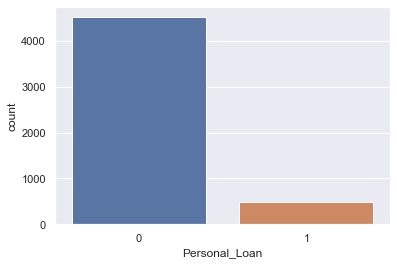

In [10]:
# Target variable is personal loan.
sns.countplot(df_loan['Personal_Loan'])
df_loan['Personal_Loan'].value_counts(normalize=True)*100

Whole data is highly imbalaced. There is 9.6% positive data.

Skewness of income: 0.841339


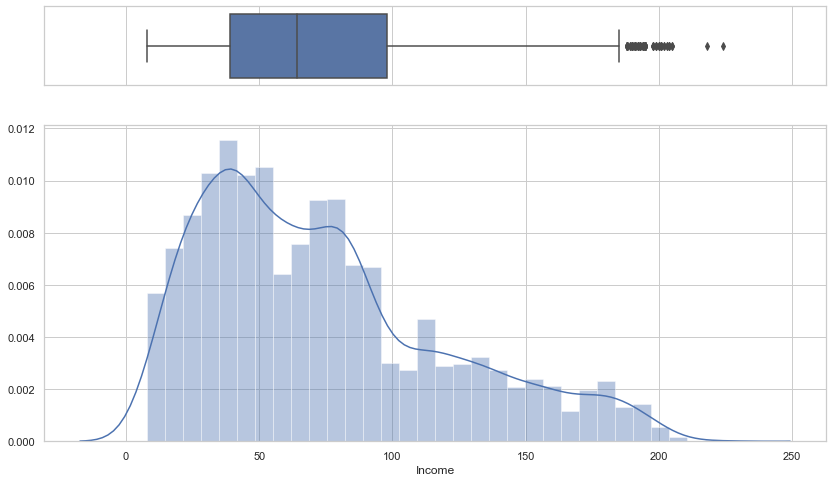

In [11]:
#Univariate analysis of data
sns.set(style="whitegrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},figsize=(14,8))
sns.boxplot(df_loan["Income"], ax=ax_box)
sns.distplot(df_loan["Income"], ax=ax_hist)
ax_box.set(xlabel='')
print("Skewness of income: %f" % df_loan['Income'].skew())

Income has outlier & moderately skewed.

Skewness of Age: -0.029341


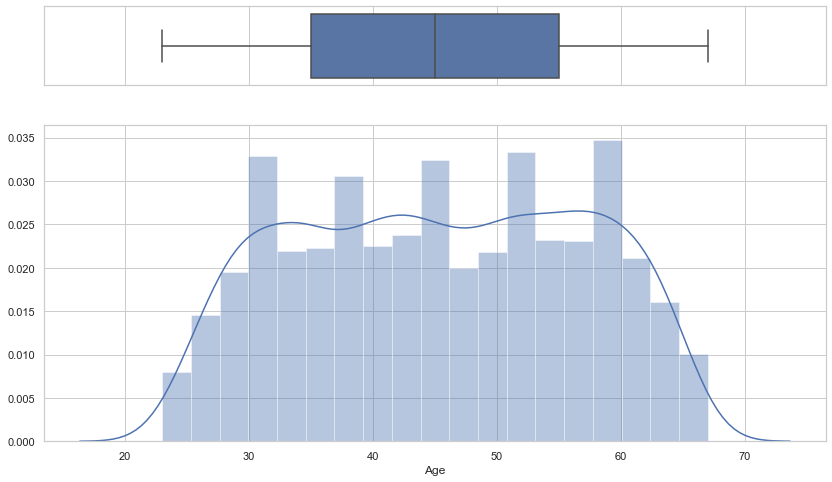

In [12]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},figsize=(14,8))
sns.boxplot(df_loan["Age"], ax=ax_box)
sns.distplot(df_loan["Age"], ax=ax_hist)
ax_box.set(xlabel='')
print("Skewness of Age: %f" % df_loan['Age'].skew())

No outlier in age category and nearly normally distributed

Skewness of Experience: -0.026325


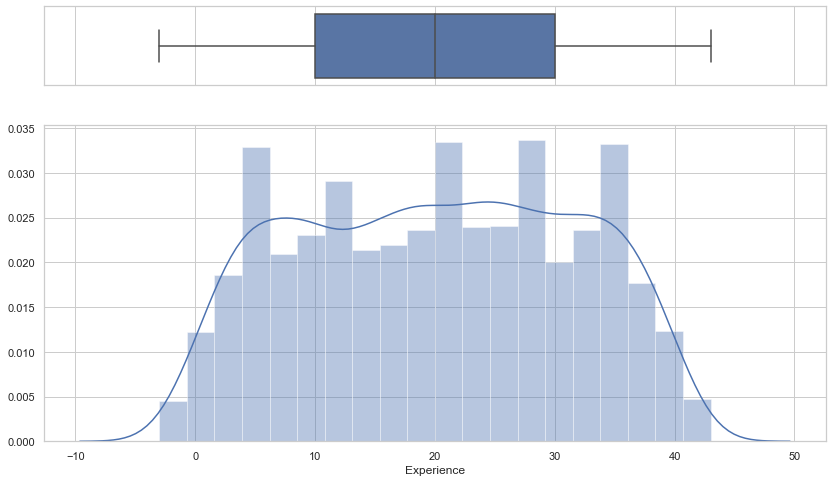

In [13]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},figsize=(14,8))
sns.boxplot(df_loan["Experience"], ax=ax_box)
sns.distplot(df_loan["Experience"], ax=ax_hist)
ax_box.set(xlabel='')
print("Skewness of Experience: %f" % df_loan['Experience'].skew())

No outlier in experience category & nearlly normally distributed

Skewness of credit card avg spend: 1.598443


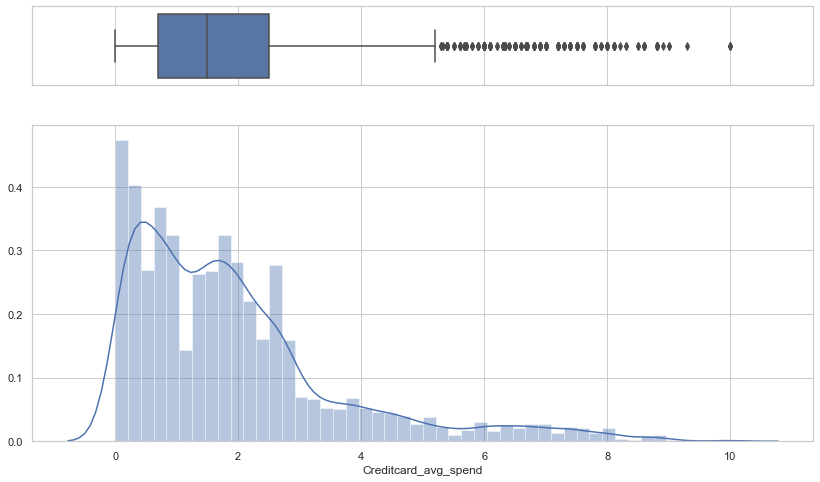

In [14]:
from scipy import stats
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},figsize=(14,8))
sns.boxplot(df_loan["Creditcard_avg_spend"], ax=ax_box)
sns.distplot(df_loan["Creditcard_avg_spend"], ax=ax_hist)
ax_box.set(xlabel='')
print("Skewness of credit card avg spend: %f" % df_loan['Creditcard_avg_spend'].skew())

Avg. spend on credit card has outliers & skewed

Skewness of Mortgage: 2.104002


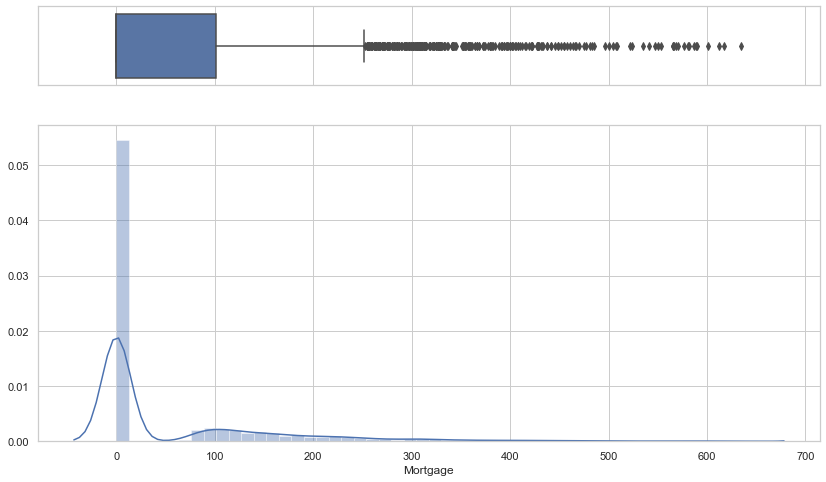

In [15]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2, .8)},figsize=(14,8))
sns.boxplot(df_loan["Mortgage"], ax=ax_box)
sns.distplot(df_loan["Mortgage"], ax=ax_hist)
ax_box.set(xlabel='')
print("Skewness of Mortgage: %f" % df_loan['Mortgage'].skew())

Mortgage has outliers & highly skewed. It can be romoved for prediction.

In [16]:
df_loan1=df_loan[['Age', 'Experience', 'Income', 'Creditcard_avg_spend', 'Mortgage','Personal_Loan']]

In [17]:
variable=df_loan1.columns
variable

Index(['Age', 'Experience', 'Income', 'Creditcard_avg_spend', 'Mortgage',
       'Personal_Loan'],
      dtype='object')

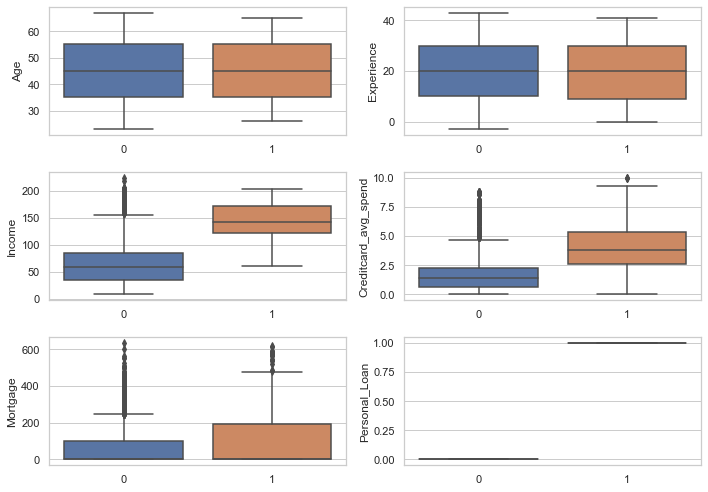

In [18]:
#Comparison of data set for loan and no loan case
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 7))
for idx, feat in enumerate(variable): 
    ax = axes[int(idx / 2), idx % 2] 
    sns.boxplot(x='Personal_Loan', y=feat, data=df_loan1, ax=ax) 
    ax.set_xlabel('') 
    ax.set_ylabel(feat) 
fig.tight_layout();

1) Avg. age & experience of people who have taken loan and not taken loan is nearly same.
2) People with higher income and credit card avg spend has taken loan.
3) Mortgage data is highly skewed and may not be useful for loan prediction

In [19]:
df_loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family_Size',
       'Creditcard_avg_spend', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'Deposit_Account', 'Online', 'CreditCard'],
      dtype='object')

In [20]:
df_loan['Personal_Loan'].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [21]:
df_loan_no=df_loan[df_loan.Personal_Loan==0]
df_loan_yes=df_loan[df_loan.Personal_Loan==1]

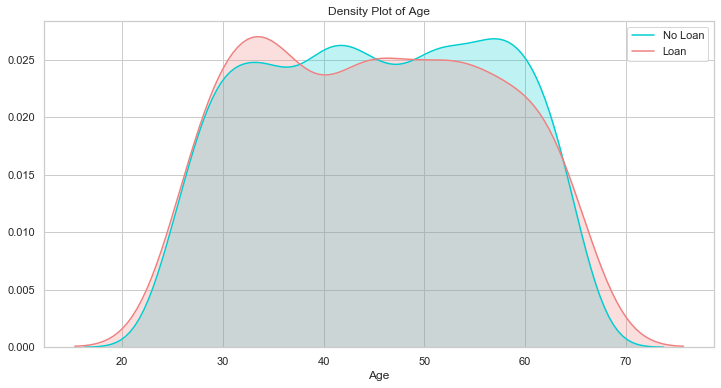

In [22]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(df_loan_no["Age"], color="darkturquoise", shade=True)
sns.kdeplot(df_loan_yes["Age"], color="lightcoral", shade=True)
plt.legend(['No Loan', 'Loan'])
plt.title('Density Plot of Age')
ax.set(xlabel='Age')
plt.show()

Avg mean and data distribution for age category is nearly same. It may not be strong variable for prediction.

In [23]:
df_loan_no.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP_Code', 'Family_Size',
       'Creditcard_avg_spend', 'Education', 'Mortgage', 'Personal_Loan',
       'Securities_Account', 'Deposit_Account', 'Online', 'CreditCard'],
      dtype='object')

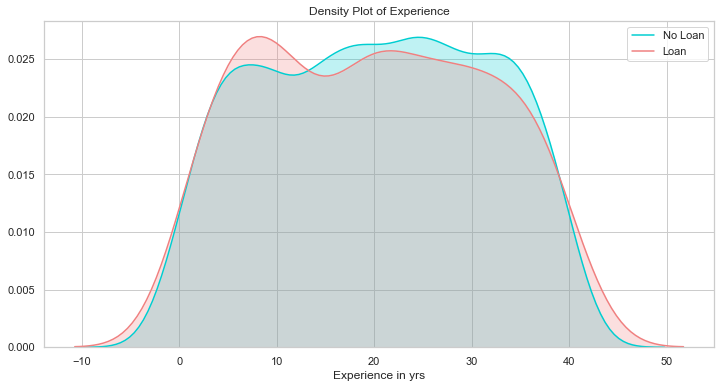

In [24]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(df_loan_no["Experience"], color="darkturquoise", shade=True)
sns.kdeplot(df_loan_yes["Experience"], color="lightcoral", shade=True)
plt.legend(['No Loan', 'Loan'])
plt.title('Density Plot of Experience')
ax.set(xlabel='Experience in yrs')
plt.show()

Avg mean and data distribution for Education category is nearly same for loan and no loan case. Seems to be strongly correlated to age.

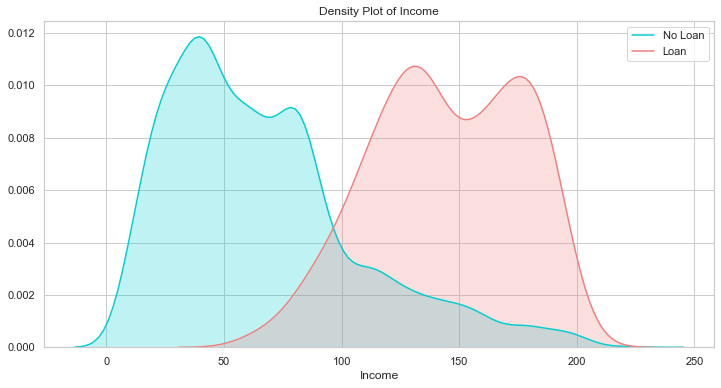

In [25]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(df_loan_no["Income"], color="darkturquoise", shade=True)
sns.kdeplot(df_loan_yes["Income"], color="lightcoral", shade=True)
plt.legend(['No Loan', 'Loan'])
plt.title('Density Plot of Income')
ax.set(xlabel='Income')
plt.show()

Income in case of loan and no loan are significantly differeent and looks like strong predictor.

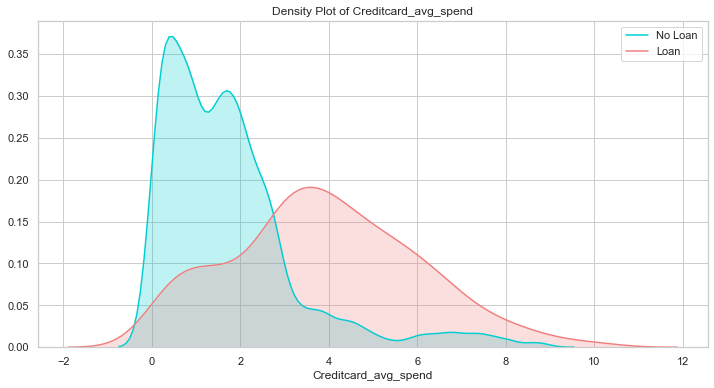

In [26]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(df_loan_no["Creditcard_avg_spend"], color="darkturquoise", shade=True)
sns.kdeplot(df_loan_yes["Creditcard_avg_spend"], color="lightcoral", shade=True)
plt.legend(['No Loan', 'Loan'])
plt.title('Density Plot of Creditcard_avg_spend')
ax.set(xlabel='Creditcard_avg_spend')
plt.show()

Credit card avg spend in case of loan and no loan are differeent and looks like strong predictor.

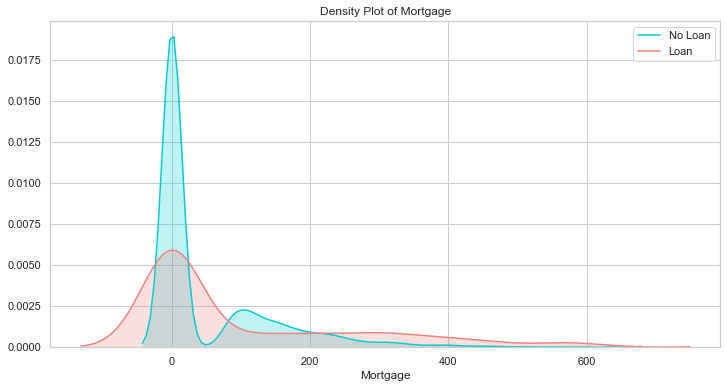

In [27]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(df_loan_no["Mortgage"], color="darkturquoise", shade=True)
sns.kdeplot(df_loan_yes["Mortgage"], color="lightcoral", shade=True)
plt.legend(['No Loan', 'Loan'])
plt.title('Density Plot of Mortgage')
ax.set(xlabel='Mortgage')
plt.show()

Mortgage is higly skewed and does seems to be predictor for the model.

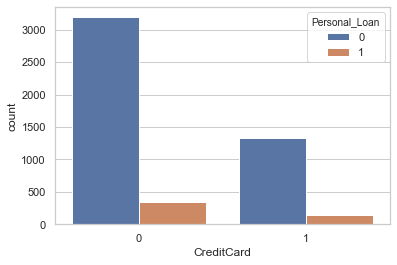

In [28]:
#Distribution of people having credit who have taken loan and not taken loan
sns.countplot(x='CreditCard', hue='Personal_Loan', data=df_loan)

In [29]:
df_loan['Personal_Loan'][(df_loan.CreditCard==0)].value_counts(normalize=True)

0    0.904533
1    0.095467
Name: Personal_Loan, dtype: float64

In [30]:
df_loan['CreditCard'][(df_loan.Personal_Loan==0)].value_counts(normalize=True)

0    0.706416
1    0.293584
Name: CreditCard, dtype: float64

9.45% of People take loan with no credit card while 9.73% of people take loan who has credit card. Credit card may not be the correct attribute for people to consider for loan

In [31]:
df_loan['Family_Size'][(df_loan.Personal_Loan==1)].value_counts(normalize=True)

4    0.279167
3    0.277083
1    0.222917
2    0.220833
Name: Family_Size, dtype: float64

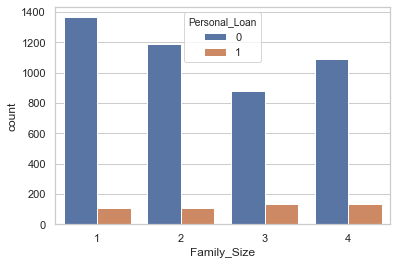

In [32]:
#Distribution of family size of people who have taken loan and not taken loan
sns.countplot(x='Family_Size', hue='Personal_Loan', data=df_loan)

% of people who take personal loan is nearly same for all family size

In [33]:
#Distribution of education of people who have taken loan and not taken loan
df_loan['Education'][(df_loan.Personal_Loan==1)].value_counts(normalize=True)

3    0.427083
2    0.379167
1    0.193750
Name: Education, dtype: float64

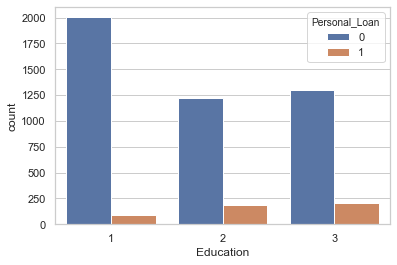

In [34]:
sns.countplot(x='Education', hue='Personal_Loan', data=df_loan)

People having advanced education tend to take more loan.

In [35]:
df_loan['Securities_Account'][(df_loan.Personal_Loan==1)].value_counts(normalize=True)

0    0.875
1    0.125
Name: Securities_Account, dtype: float64

In [36]:
df_loan['Personal_Loan'][(df_loan.Securities_Account==1)].value_counts(normalize=True)

0    0.885057
1    0.114943
Name: Personal_Loan, dtype: float64

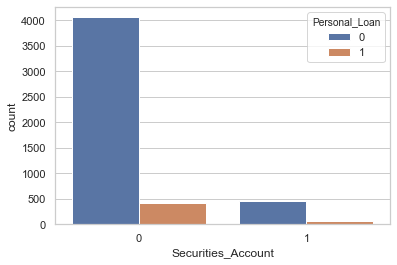

In [37]:
#Distribution of people who have taken loan and not taken loan in case they have securities account
sns.countplot(x='Securities_Account', hue='Personal_Loan', data=df_loan)

12.5% of people having securities account tend to take loan. It may not be a strong predictor for loan.

In [38]:
df_loan['Deposit_Account'][(df_loan.Personal_Loan==1)].value_counts(normalize=True)

0    0.708333
1    0.291667
Name: Deposit_Account, dtype: float64

In [39]:
df_loan['Personal_Loan'][(df_loan.Deposit_Account==1)].value_counts(normalize=True)

0    0.536424
1    0.463576
Name: Personal_Loan, dtype: float64

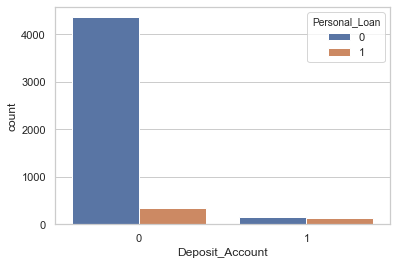

In [40]:
#Distribution of people who have taken loan and not taken loan in case they have deposit account
sns.countplot(x='Deposit_Account', hue='Personal_Loan', data=df_loan)

~50% of people having deposit account tend to take personal loan. It can be used as one of the attribute for loan prediction

In [41]:
df_loan['Online'][(df_loan.Personal_Loan==1)].value_counts(normalize=True)

1    0.60625
0    0.39375
Name: Online, dtype: float64

In [42]:
df_loan['Personal_Loan'][(df_loan.Online==1)].value_counts(normalize=True)

0    0.90248
1    0.09752
Name: Personal_Loan, dtype: float64

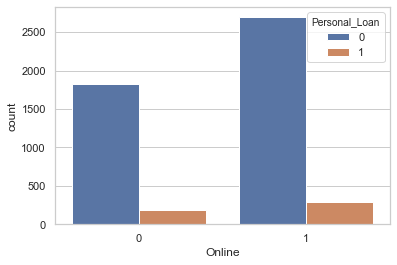

In [43]:
#Distribution of people who have taken loan and not taken loan in case they do online transactions
sns.countplot(x='Online', hue='Personal_Loan', data=df_loan)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

In [44]:
df_loan= df_loan.drop('ID', axis =1 )

60% of people who do online transaction tend to take loan. It may be used as one of the predictors for loan.

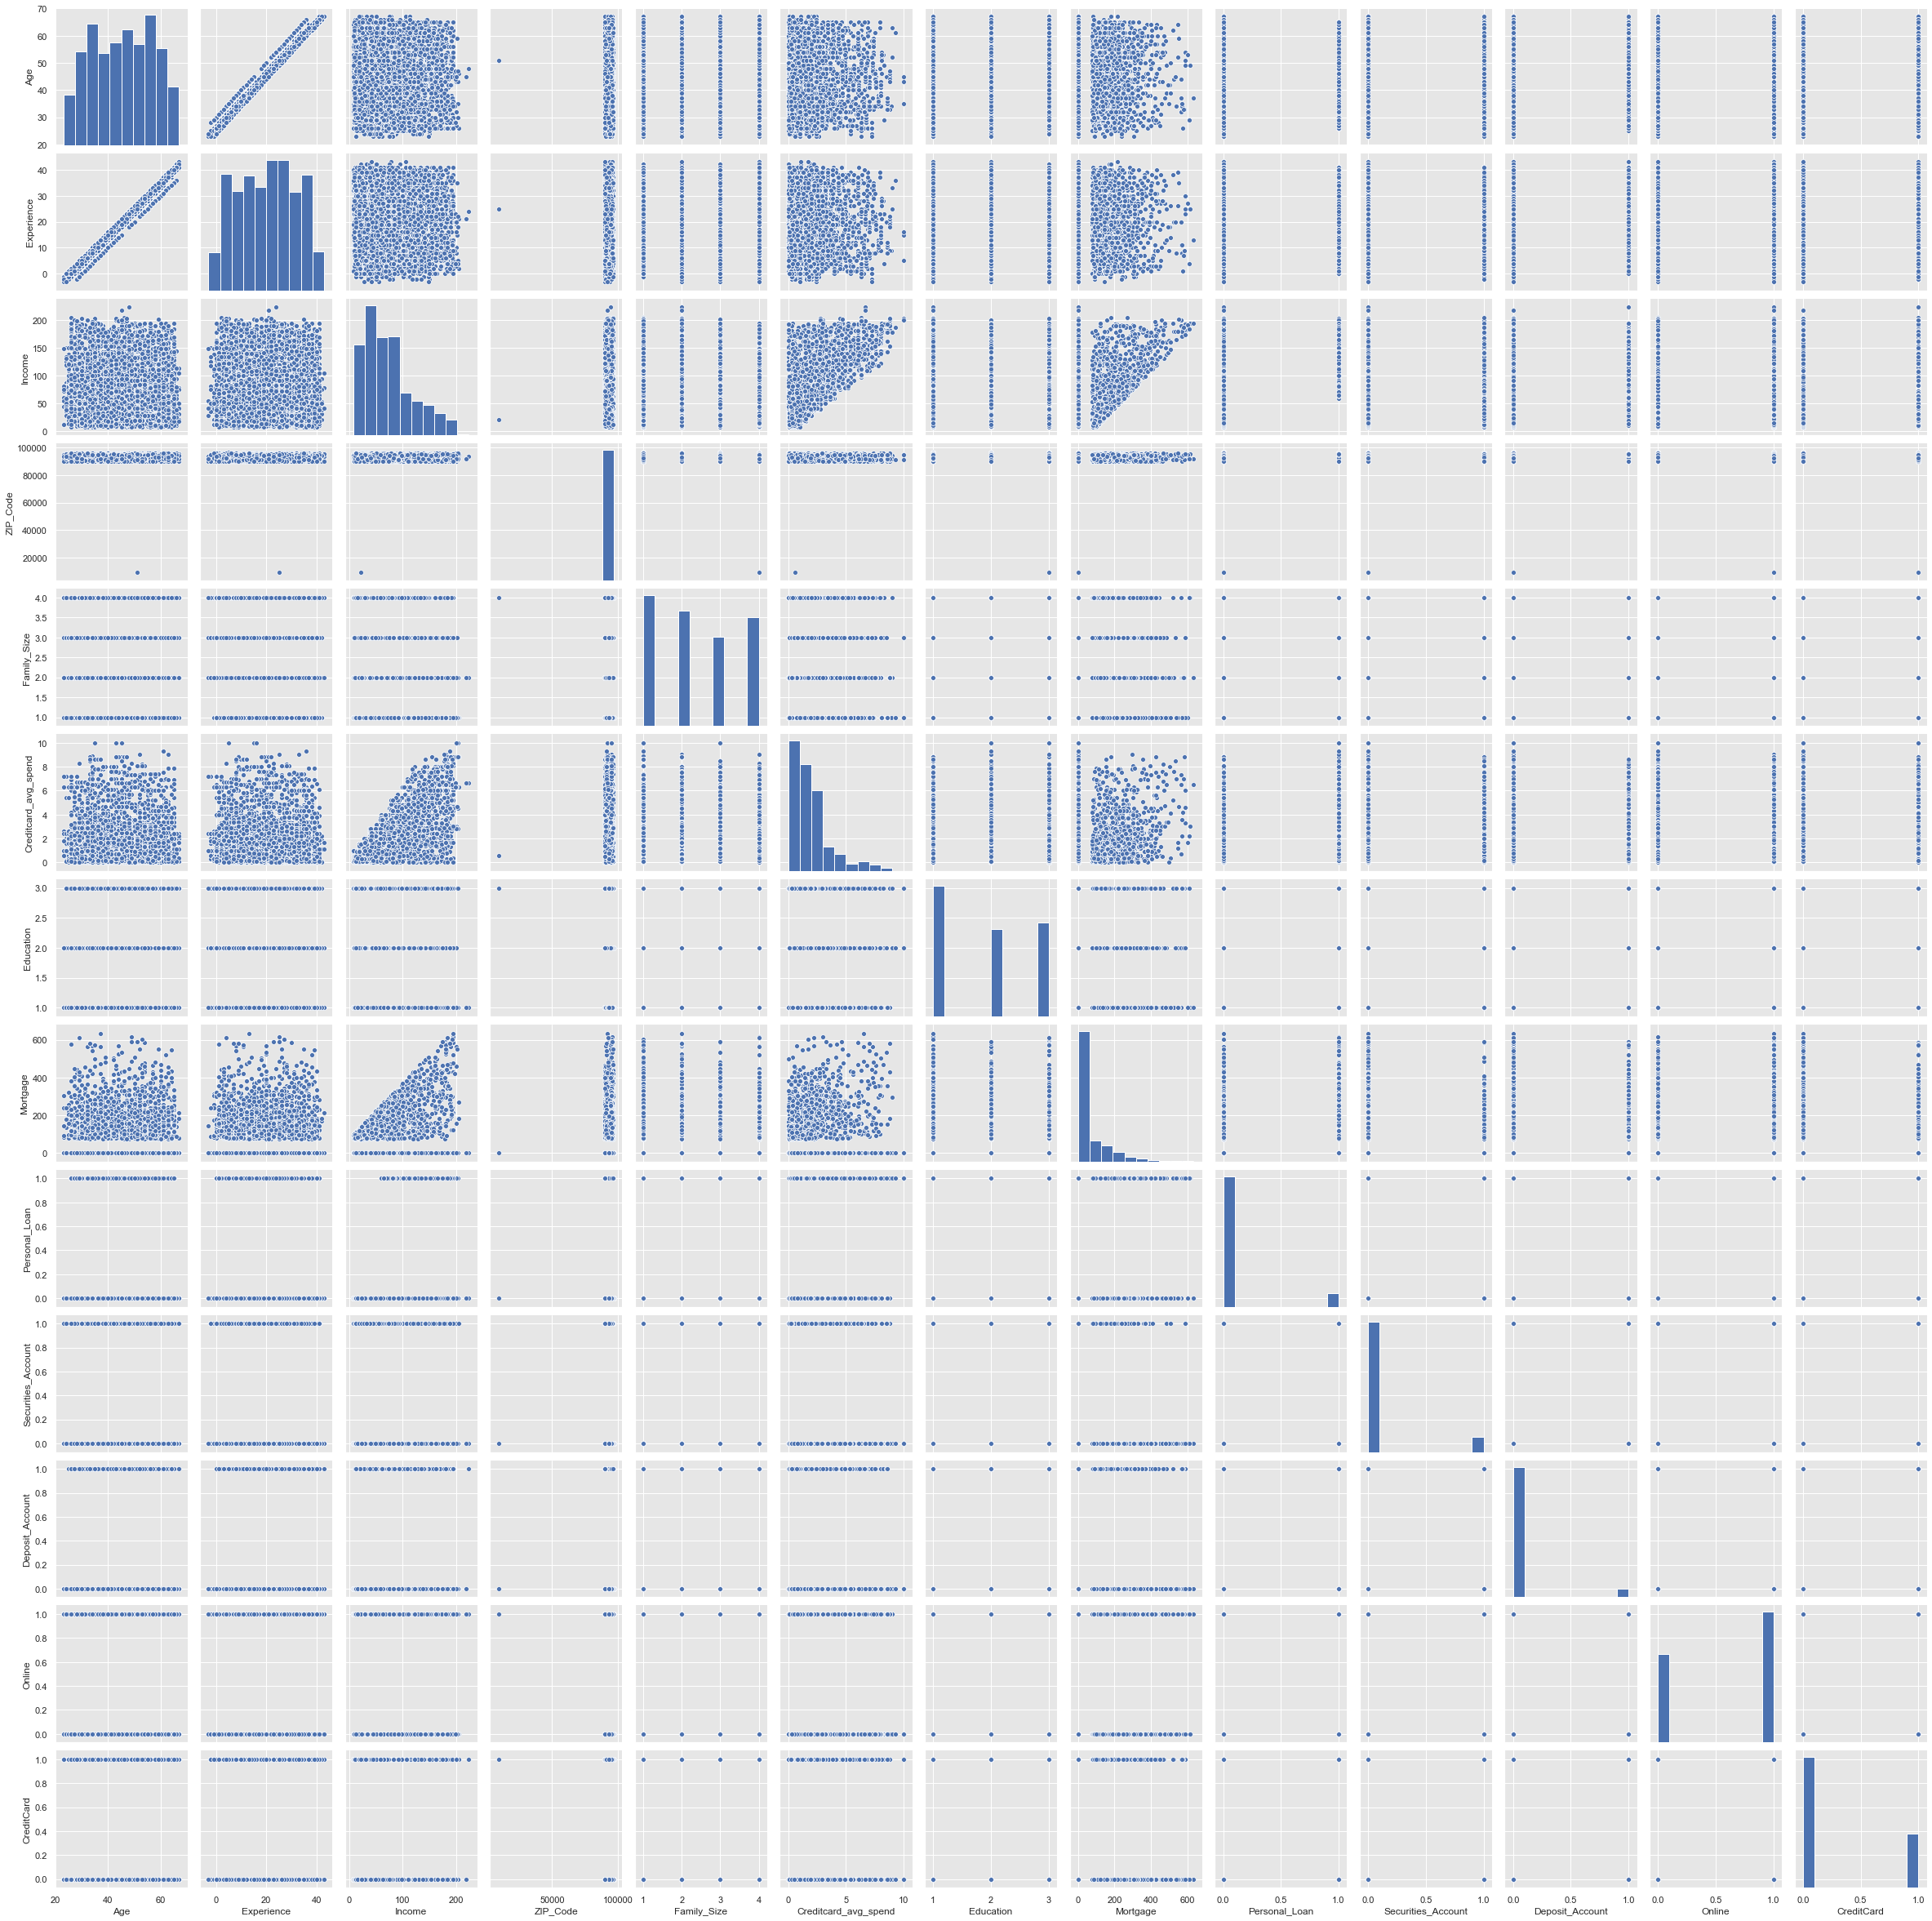

In [45]:
# Bivariate analysis if variables
sns.pairplot(df_loan)

Age and experience seems to highly correlatable

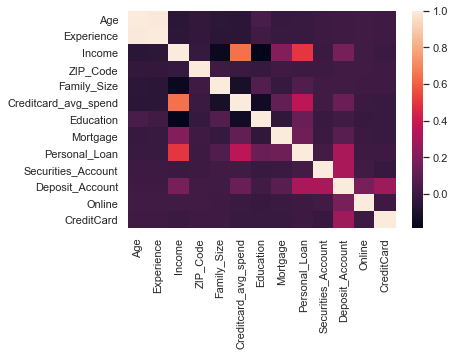

In [46]:
# Heat map for correlation visualization across variable
corr_matrix = df_loan.corr()
sns.heatmap(corr_matrix)

In [47]:
# Corrleation matrix
corr_matrix

,Age,Experience,Income,ZIP_Code,Family_Size,Creditcard_avg_spend,Education,Mortgage,Personal_Loan,Securities_Account,Deposit_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP_Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family_Size,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
Creditcard_avg_spend,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


Age and experience are highly correlatable. Either of one parameter can be used for predictive model.

In [48]:
#Outlier Capping
df_loan['Income']=df_loan['Income'].clip(upper=df_loan['Income'].quantile(0.99))
df_loan['Creditcard_avg_spend']=df_loan['Creditcard_avg_spend'].clip(upper=df_loan['Creditcard_avg_spend'].quantile(0.99))

In [49]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.717600,45.879608,8.0,39.0,64.0,98.0,193.0
ZIP_Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family_Size,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
Creditcard_avg_spend,5000.0,1.932938,1.728717,0.0,0.7,1.5,2.5,8.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [50]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   5000 non-null   int64  
 1   Experience            5000 non-null   int64  
 2   Income                5000 non-null   int64  
 3   ZIP_Code              5000 non-null   int64  
 4   Family_Size           5000 non-null   int64  
 5   Creditcard_avg_spend  5000 non-null   float64
 6   Education             5000 non-null   int64  
 7   Mortgage              5000 non-null   int64  
 8   Personal_Loan         5000 non-null   int64  
 9   Securities_Account    5000 non-null   int64  
 10  Deposit_Account       5000 non-null   int64  
 11  Online                5000 non-null   int64  
 12  CreditCard            5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [51]:
# dropping zipcode variable as it is not predictor
df_loan=df_loan.drop('ZIP_Code',axis=1)

In [52]:
X = df_loan.drop('Personal_Loan',axis=1)
Y = df_loan[['Personal_Loan']]

In [53]:
# Scaling variables to min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [54]:
# Scaling numerical variables to min max scaler
var= ['Age', 'Experience', 'Income','Creditcard_avg_spend','Mortgage']
df_loan[var] = scaler.fit_transform(df_loan[var])

In [55]:
df_loan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,0.507691,0.260526,0.0,0.272727,0.500000,0.727273,1.0
Experience,5000.0,0.502274,0.249303,0.0,0.282609,0.500000,0.717391,1.0
Income,5000.0,0.355230,0.247998,0.0,0.167568,0.302703,0.486486,1.0
Family_Size,5000.0,2.396400,1.147663,1.0,1.000000,2.000000,3.000000,4.0
Creditcard_avg_spend,5000.0,0.241617,0.216090,0.0,0.087500,0.187500,0.312500,1.0
Education,5000.0,1.881000,0.839869,1.0,1.000000,2.000000,3.000000,3.0
Mortgage,5000.0,0.088974,0.160179,0.0,0.000000,0.000000,0.159055,1.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.000000,0.000000,0.000000,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.000000,0.000000,0.000000,1.0
Deposit_Account,5000.0,0.060400,0.238250,0.0,0.000000,0.000000,0.000000,1.0


In [56]:
df_loan.head()

,Age,Experience,Income,Family_Size,Creditcard_avg_spend,Education,Mortgage,Personal_Loan,Securities_Account,Deposit_Account,Online,CreditCard
0,0.045455,0.086957,0.221622,4,0.2000,1,0.0,0,1,0,0,0
1,0.500000,0.478261,0.140541,3,0.1875,1,0.0,0,1,0,0,0
2,0.363636,0.391304,0.016216,1,0.1250,1,0.0,0,0,0,0,0
3,0.272727,0.260870,0.497297,1,0.3375,2,0.0,0,0,0,0,0
4,0.272727,0.239130,0.200000,4,0.1250,2,0.0,0,0,0,0,1


In [57]:
# Splitting the data in test and train in 70:30 ratio
X_train,X_test,Y_train,Y_test= train_test_split(X, Y, test_size=0.30,random_state=42)

In [58]:
X_train.columns

Index(['Age', 'Experience', 'Income', 'Family_Size', 'Creditcard_avg_spend',
       'Education', 'Mortgage', 'Securities_Account', 'Deposit_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [59]:
# Making logistic regression model using sklearn
logitregr=LogisticRegression()

In [60]:
logitregr.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
# Score of the logistic regression modoel.
score = logitregr.score(X_test, Y_test)
print(score)

0.9506666666666667


In [62]:
# Making logistic regression model using statmodel to visualize parameter important
import statsmodels.api as sm
logit_model = sm.Logit( Y_train,sm.add_constant(X_train ))
lg = logit_model.fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.127480
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.586      
Dependent Variable:   Personal_Loan     AIC:               916.3568   
Date:                 2020-02-16 13:29  BIC:               990.2830   
No. Observations:     3500              Log-Likelihood:    -446.18    
Df Model:             11                LL-Null:           -1077.3    
Df Residuals:         3488              LLR p-value:       6.3162e-264
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       9.0000                                          
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
const                -12.4031   1.9589 -6.3318 0.0000 -16.2424 -8.5638
Age                   -0.0434   0.0725 -0.5993 0.5490  -0.1855  0.0986
Experience             0.0568   0.0720  0.7890 0.4301  -0.0843  0.1978
Income                 0.0542   0.0032 17.1869 0.0000   0.0480  0.0603
Family_Size            0.7104   0.0887  8.0099 0.0000   0.5365  0.8842
Creditcard_avg_spend   0.1253   0.0489  2.5610 0.0104   0.0294  0.2212
Education              1.6720   0.1373 12.1805 0.0000   1.4029  1.9410
Mortgage               0.0006   0.0006  0.9927 0.3209  -0.0006  0.0019
Securities_Account    -0.9708   0.3534 -2.7473 0.0060  -1.6634 -0.2782
Deposit_Account        3.6691   0.3919  9.3627 0.0000   2.9010  4.4372
Online                -0.5614   0.1895 -2.9625 0.0031  -0.9327 -0.1900
CreditCard            -1.1691   0.2496 -4.6838 0.0000  -1.6583 -0.6799
======================================================================

"""

In [63]:
# Identifing multi collinearlity in the data
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [64]:
# VIF model for multi collinearlity
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Age,75.01
1,Experience,28.82
5,Education,6.65
2,Income,6.59
3,Family_Size,5.49
4,Creditcard_avg_spend,3.85
9,Online,2.58
10,CreditCard,1.58
8,Deposit_Account,1.42
6,Mortgage,1.39


In [65]:
# Dropping age as variable as it has very high VIF
X_new2 = X.drop('Age', 1)
X_new2.head()

,Experience,Income,Family_Size,Creditcard_avg_spend,Education,Mortgage,Securities_Account,Deposit_Account,Online,CreditCard
1840,25,23,4,0.4,3,88,0,0,0,0
2115,31,30,3,1.4,1,0,0,0,0,0
4437,38,63,2,1.5,1,0,0,0,1,0
1146,7,71,1,0.1,1,78,1,0,0,0
2486,36,130,1,1.3,1,257,0,0,0,0


In [66]:
# Remaking model after dropping 'Age' variable
logit_model2= sm.Logit( Y_train,sm.add_constant(X_new2 ))
lg2 = logit_model2.fit()
lg2.summary2()

Optimization terminated successfully.
         Current function value: 0.127532
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.586      
Dependent Variable:   Personal_Loan      AIC:                914.7223   
Date:                 2020-02-16 13:29   BIC:                982.4880   
No. Observations:     3500               Log-Likelihood:     -446.36    
Df Model:             10                 LL-Null:            -1077.3    
Df Residuals:         3489               LLR p-value:        6.5703e-265
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       9.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -13.5015   0.7121 -18.9604 0.0000 -14.8972 -12.1058
Experience             0.0139   0.0077   1.8084 0.0705  -0.0012   0.0290
Income                 0.0543   0.0031  17.2674 0.0000   0.0481   0.0605
Family_Size            0.7109   0.0887   8.0132 0.0000   0.5370   0.8848
Creditcard_avg_spend   0.1250   0.0489   2.5574 0.0105   0.0292   0.2208
Education              1.6579   0.1352  12.2591 0.0000   1.3929   1.9230
Mortgage               0.0006   0.0006   0.9668 0.3336  -0.0006   0.0019
Securities_Account    -0.9664   0.3526  -2.7410 0.0061  -1.6575  -0.2754
Deposit_Account        3.6726   0.3914   9.3840 0.0000   2.9056   4.4397
Online                -0.5599   0.1894  -2.9560 0.0031  -0.9311  -0.1887
CreditCard            -1.1629   0.2493  -4.6643 0.0000  -1.6515  -0.6742
========================================================================

"""

In [67]:
# VIF model for multi collinearlity after dropping 'Age' variable
vif = pd.DataFrame()
X = X_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Income,5.67
4,Education,4.41
2,Family_Size,4.10
3,Creditcard_avg_spend,3.83
0,Experience,3.34
8,Online,2.39
9,CreditCard,1.52
5,Mortgage,1.39
7,Deposit_Account,1.37
6,Securities_Account,1.25


In [68]:
# Creating new model after dropping Age variable
logitregr.fit(X_new2,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Model score after dropping age variable
X_test2=X_test.drop('Age', 1)
score = logitregr.score(X_test2, Y_test)
print(score)

0.95


No change in the score as invisaged.

In [70]:
# Dropping 'Mortgage' variable as P value from stat model is greater than 0.05 & creating a new train data frame.
X_new3=X_new2.drop('Mortgage',1)
X_new3

,Experience,Income,Family_Size,Creditcard_avg_spend,Education,Securities_Account,Deposit_Account,Online,CreditCard
1840,25,23,4,0.4,3,0,0,0,0
2115,31,30,3,1.4,1,0,0,0,0
4437,38,63,2,1.5,1,0,0,1,0
1146,7,71,1,0.1,1,1,0,0,0
2486,36,130,1,1.3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4426,8,140,1,4.6,1,0,0,1,0
466,0,13,2,0.9,3,0,0,1,0
3092,18,113,2,0.4,1,1,0,0,0
3772,10,152,2,3.0,1,0,0,1,0


In [71]:
# Creating a logistic regression model after dropping Age,Mortgage variable
logitregr.fit(X_new3,Y_train)
X_test3=X_test2.drop('Mortgage', 1)
score = logitregr.score(X_test3, Y_test)
print(score)

0.9493333333333334


In [72]:
#Creating logistic regression model using statmodel to visualization feature important and model parameters
logit_model3= sm.Logit( Y_train,sm.add_constant(X_new3 ))
lg3 = logit_model3.fit()
lg3.summary2()

Optimization terminated successfully.
         Current function value: 0.127665
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.585      
Dependent Variable:   Personal_Loan      AIC:                913.6528   
Date:                 2020-02-16 13:29   BIC:                975.2580   
No. Observations:     3500               Log-Likelihood:     -446.83    
Df Model:             9                  LL-Null:            -1077.3    
Df Residuals:         3490               LLR p-value:        8.5655e-266
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       9.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -13.4729   0.7103 -18.9670 0.0000 -14.8651 -12.0807
Experience             0.0141   0.0077   1.8339 0.0667  -0.0010   0.0292
Income                 0.0546   0.0031  17.4451 0.0000   0.0485   0.0608
Family_Size            0.7149   0.0888   8.0549 0.0000   0.5409   0.8889
Creditcard_avg_spend   0.1211   0.0487   2.4854 0.0129   0.0256   0.2165
Education              1.6494   0.1346  12.2586 0.0000   1.3857   1.9131
Securities_Account    -0.9770   0.3532  -2.7657 0.0057  -1.6693  -0.2846
Deposit_Account        3.6897   0.3919   9.4156 0.0000   2.9216   4.4577
Online                -0.5601   0.1893  -2.9588 0.0031  -0.9311  -0.1891
CreditCard            -1.1724   0.2491  -4.7076 0.0000  -1.6606  -0.6843
========================================================================

"""

In [73]:
# VIF on new dataframe after dropping Age and Mortgage feature
vif = pd.DataFrame()
X = X_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Income,5.43
4,Education,4.40
2,Family_Size,4.09
3,Creditcard_avg_spend,3.83
0,Experience,3.33
7,Online,2.39
8,CreditCard,1.52
6,Deposit_Account,1.36
5,Securities_Account,1.25


In [74]:
Y_pred=logitregr.predict(X_test3)

In [75]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(Y_test, Y_pred)
print(cm_test)

[[1326   17]
 [  59   98]]


In [76]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1343
           1       0.85      0.62      0.72       157

    accuracy                           0.95      1500
   macro avg       0.90      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



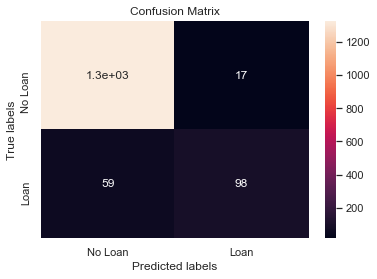

In [77]:
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Loan', 'Loan']); ax.yaxis.set_ticklabels(['No Loan', 'Loan']);

In [78]:
# Classification report for logistic regression model created by dropping Age, Mortgage feature
Y_pred_train=logitregr.predict(X_new3)
cm_train = confusion_matrix(Y_train, Y_pred_train)
print(cm_train)
print(classification_report(Y_train, Y_pred_train))

[[3135   42]
 [ 133  190]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.82      0.59      0.68       323

    accuracy                           0.95      3500
   macro avg       0.89      0.79      0.83      3500
weighted avg       0.95      0.95      0.95      3500



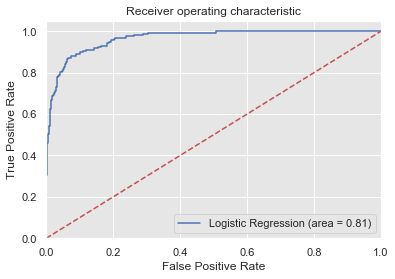

In [79]:
# ROC Curve for logistic regression model created by dropping Age, Mortgage feature
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, logitregr.predict_proba(X_test3)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [80]:
# Dropping experience variable form train & test data
# Model made by dropping Age, Experience & Mortgage feature from train and test data.
X_new5=X_new3.drop('Experience',1)
logitregr.fit(X_new5,Y_train)
X_test5=X_test3.drop('Experience', 1)
score = logitregr.score(X_test5, Y_test)
print(score)

0.9506666666666667


In [81]:
#Score & classification report on newly trained model.
Y_pred_train=logitregr.predict(X_new5)
cm_train = confusion_matrix(Y_train, Y_pred_train)
print(cm_train)
print(classification_report(Y_train, Y_pred_train))

[[3134   43]
 [ 125  198]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.82      0.61      0.70       323

    accuracy                           0.95      3500
   macro avg       0.89      0.80      0.84      3500
weighted avg       0.95      0.95      0.95      3500



In [82]:
Y_pred5=logitregr.predict(X_test5)
cm_test = confusion_matrix(Y_test, Y_pred5)

In [83]:
logit_model5= sm.Logit( Y_train,sm.add_constant(X_new5 ))
lg5 = logit_model5.fit()
lg5.summary2()

Optimization terminated successfully.
         Current function value: 0.128148
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Pseudo R-squared:   0.584      
Dependent Variable:   Personal_Loan      AIC:                915.0342   
Date:                 2020-02-16 13:29   BIC:                970.4788   
No. Observations:     3500               Log-Likelihood:     -448.52    
Df Model:             8                  LL-Null:            -1077.3    
Df Residuals:         3491               LLR p-value:        3.5549e-266
Converged:            1.0000             Scale:              1.0000     
No. Iterations:       9.0000                                            
------------------------------------------------------------------------
                      Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------------
const                -13.0987   0.6689 -19.5831 0.0000 -14.4097 -11.7877
Income                 0.0544   0.0031  17.4638 0.0000   0.0483   0.0605
Family_Size            0.7061   0.0886   7.9691 0.0000   0.5325   0.8798
Creditcard_avg_spend   0.1116   0.0484   2.3047 0.0212   0.0167   0.2066
Education              1.6360   0.1335  12.2540 0.0000   1.3743   1.8976
Securities_Account    -0.9805   0.3516  -2.7889 0.0053  -1.6696  -0.2914
Deposit_Account        3.7162   0.3918   9.4843 0.0000   2.9482   4.4842
Online                -0.5513   0.1887  -2.9219 0.0035  -0.9210  -0.1815
CreditCard            -1.1771   0.2493  -4.7224 0.0000  -1.6656  -0.6885
========================================================================

"""

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.83      0.67      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500



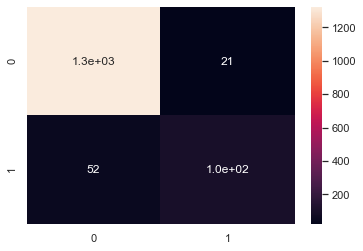

In [84]:
#Logistic Regression with Hyper Parameter Tuning using GridSearchCV

import warnings
warnings.filterwarnings('ignore')

#Grid Search
from sklearn.model_selection import GridSearchCV
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25,50]}
grid_clf_acc = GridSearchCV(logitregr, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_new5, Y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test5)

# New Model Evaluation metrics 
print(classification_report(Y_test, y_pred_acc))

#Logistic Regression (Grid Search) Confusion matrix
cm_logit=confusion_matrix(Y_test,y_pred_acc)
cm_logit
#Heat map Confusion matrix
sns.heatmap(cm_logit,annot=True)

In [85]:
# Grid search CV best parameters
grid_clf_acc.best_params_

{'C': 10, 'penalty': 'l2'}

In [86]:
# Final logistic regression model using best hyperparameters obtained from Gridseach CV
# Model regularized using L2 penalty norm.
logitregr2=LogisticRegression(C=10,penalty="l2")
logitregr2.fit(X_new5,Y_train)
score = logitregr2.score(X_test5, Y_test)
print(score)

0.9513333333333334


In [87]:
#Confusion matrix on training data
Y_pred_train2=logitregr2.predict(X_new5)
cm_train2 = confusion_matrix(Y_train, Y_pred_train2)
print(cm_train2)
print(classification_report(Y_train, Y_pred_train2))

[[3133   44]
 [ 122  201]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3177
           1       0.82      0.62      0.71       323

    accuracy                           0.95      3500
   macro avg       0.89      0.80      0.84      3500
weighted avg       0.95      0.95      0.95      3500



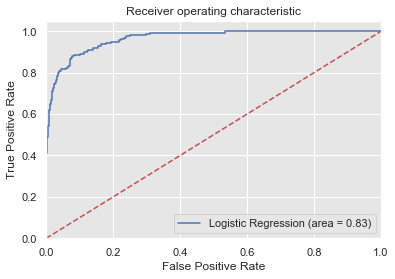

In [88]:
#ROC Curve for logistic regression model
Y_pred2=logitregr2.predict(X_test5)
logit_roc_auc1 = roc_auc_score(Y_test, Y_pred2)
fpr, tpr, thresholds = roc_curve(Y_test, logitregr2.predict_proba(X_test5)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Increase in AUC can be clearly seen by using model best values of hyperparametrs & regularized using L2 norm.

In [89]:
#Implementing KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_clf= KNeighborsClassifier(n_neighbors=5)
KNN_clf.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [90]:
# Predicting score of KNN model using all features of data on test data
predicted_labels = KNN_clf.predict(X_test)
KNN_clf.score(X_test, Y_test)

0.9026666666666666

In [91]:
# Predicting score of KNN model using all features of data on train data
predicted_labels_train=KNN_clf.predict(X_train)
KNN_clf.score(X_train, Y_train)

0.9448571428571428

Decrease in model performance from train to test. It may be because of overfitting.

In [92]:
print(classification_report(Y_train, predicted_labels_train))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3177
           1       0.81      0.53      0.64       323

    accuracy                           0.94      3500
   macro avg       0.88      0.76      0.80      3500
weighted avg       0.94      0.94      0.94      3500



In [93]:
print(classification_report(Y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1343
           1       0.56      0.31      0.40       157

    accuracy                           0.90      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.89      0.90      0.89      1500



In [94]:
#KNN model by dropping Age and Mortgage feature in data set
KNN_clf_n5= KNeighborsClassifier(n_neighbors=5)
KNN_clf_n5.fit(X_new3,Y_train)
KNN_clf_n5.score(X_test3, Y_test)

0.9193333333333333

In [95]:
#KNN model by dropping Age, Experience and Mortgage feature in data set
KNN_clf_n= KNeighborsClassifier(n_neighbors=5)
KNN_clf_n.fit(X_new5,Y_train)
KNN_clf_n.score(X_test5, Y_test)

0.956

Clearly improvement seen in model score by dropping features.

In [96]:
# Finding the best parameter for KNN using Gridsearch CV
# Hyperparameters are n_neighbors,leaf_size,weights & algorithm
model = KNeighborsClassifier()
params = {'n_neighbors':[3,5,7,9,11,13,15,17],
          'leaf_size':[1,2,3,5,7],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}
model1 = GridSearchCV(model, param_grid=params,scoring = 'recall')
model1.fit(X_new5,Y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
#Prediction
prediction=model1.predict(X_test5)
#importing the metrics module
from sklearn import metrics
#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(prediction,Y_test))

Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.952


No Gain in Accuracy using Gridsearch Cv method. Default 5 neighbors is giving best result

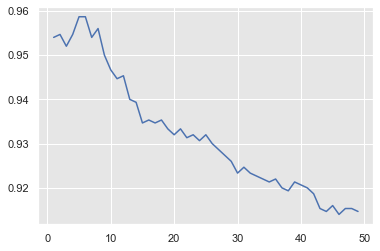

In [97]:
# Plotting for score vs no's of neighbors
scores =[]
for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(X_new5, Y_train)
    scores.append(NNH.score(X_test5, Y_test))
plt.plot(range(1,50),scores)

In [98]:
# Best score acheived using n_neighbors=5 and dropping age, mortgage & Experience variable
KNN_clf_n5= KNeighborsClassifier(n_neighbors=5)
KNN_clf_n5.fit(X_new5,Y_train)
KNN_clf_n5.score(X_test5, Y_test)
predicted_labels_test=KNN_clf_n5.predict(X_test5)
predicted_labels_train=KNN_clf_n5.predict(X_new5)
print(classification_report(Y_test, predicted_labels_test))
cm=confusion_matrix(Y_test, predicted_labels_test)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.91      0.64      0.75       157

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500



array([[1333,   10],
       [  56,  101]])

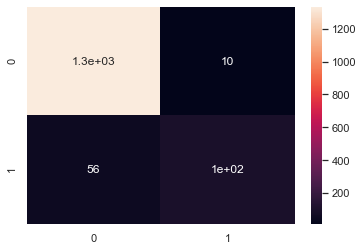

In [99]:
# Confusion matrix of Final KNN model
cm_KNN=confusion_matrix(Y_test, predicted_labels_test)
sns.heatmap(cm_KNN,annot=True)
cm_KNN

In [100]:
# Naive Bayes model 
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB()
NB_clf.fit(X_new3, Y_train)
Y_pred_NB=NB_clf.predict(X_test3)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_pred_NB,Y_test)))
print(classification_report(Y_test, Y_pred_NB))

Model Accuracy: 0.9007
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1343
           1       0.52      0.62      0.57       157

    accuracy                           0.90      1500
   macro avg       0.74      0.78      0.76      1500
weighted avg       0.91      0.90      0.90      1500



In [101]:
Y_pred_NB_train=NB_clf.predict(X_new3)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_pred_NB_train,Y_train)))
print(classification_report(Y_train, Y_pred_NB_train))

Model Accuracy: 0.8891
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      3177
           1       0.42      0.56      0.48       323

    accuracy                           0.89      3500
   macro avg       0.69      0.74      0.71      3500
weighted avg       0.90      0.89      0.90      3500



In [102]:
# Naive Bayes model on train data by dropping Age, experience and Mortgage data
NB_clf.fit(X_new5, Y_train)
Y_pred_NB=NB_clf.predict(X_test5)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_pred_NB,Y_test)))
print(classification_report(Y_test, Y_pred_NB))

Model Accuracy: 0.9007
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1343
           1       0.52      0.62      0.57       157

    accuracy                           0.90      1500
   macro avg       0.74      0.78      0.76      1500
weighted avg       0.91      0.90      0.90      1500



No change in accuracy by dropping Age, experience and Mortgage data.

In [103]:
# Grid Seacrh CV for Naive Bayes model
# var_smoothing is the hyperparameter of Naive Bayes
nb_classifier=GaussianNB()
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB,scoring='recall')
gs_NB.fit(X_new5,Y_train)
print("Best Hyper Parameters:\n",gs_NB.best_params_)
#Prediction
Y_pred_NB=gs_NB.predict(X_test5)

#evaluation(Accuracy)
print("Accuracy:",metrics.accuracy_score(Y_pred_NB,Y_test))

Best Hyper Parameters:
 {'var_smoothing': 3.511191734215127e-05}
Accuracy: 0.9166666666666666


In [104]:
# Naive Bayes Model accuracy, f score on train & test data
nb_classifier=GaussianNB(var_smoothing=3.511191734215127e-05)
nb_classifier.fit(X_new5, Y_train)
Y_pred_NB=nb_classifier.predict(X_test5)
print("Model Accuracy on Test Data")
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_pred_NB,Y_test)))
print(classification_report(Y_test, Y_pred_NB))

print("Model Accuracy on Training Data")
Y_pred_NB_train=nb_classifier.predict(X_new5)
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(Y_pred_NB_train,Y_train)))
print(classification_report(Y_train, Y_pred_NB_train))

Model Accuracy on Test Data
Model Accuracy: 0.9167
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1343
           1       0.60      0.64      0.62       157

    accuracy                           0.92      1500
   macro avg       0.78      0.79      0.78      1500
weighted avg       0.92      0.92      0.92      1500

Model Accuracy on Training Data
Model Accuracy: 0.9117
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3177
           1       0.52      0.58      0.55       323

    accuracy                           0.91      3500
   macro avg       0.74      0.76      0.75      3500
weighted avg       0.92      0.91      0.91      3500



[[1275   68]
 [  57  100]]


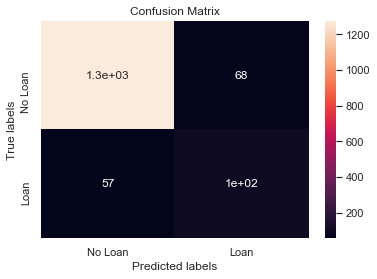

In [105]:
# Confusion matrix of Naive Bayes Model
cm_NB_test=confusion_matrix(Y_test,Y_pred_NB)
print(cm_NB_test)

ax= plt.subplot()
sns.heatmap(cm_NB_test,annot=True,ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['No Loan', 'Loan']); ax.yaxis.set_ticklabels(['No Loan', 'Loan']);

In [106]:
probs=nb_classifier.predict_proba(X_test5)
fpr, tpr, thresholds = roc_curve(Y_test, probs[:,1])

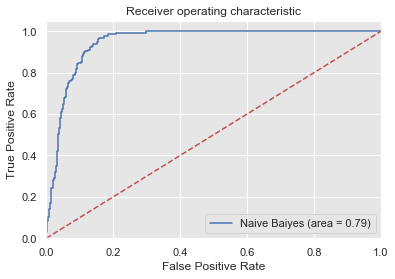

In [107]:
# ROC curve of Naive Bayes model
Y_pred_NB=nb_classifier.predict(X_test5)
NB_roc_auc = roc_auc_score(Y_test, Y_pred_NB)
fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Naive Baiyes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [108]:
# classification Report of all models on test data

#Logistic regression Classifier
print("Model Accuracy Logistic Regression")
print("Model Accuracy Logistic Regression: {0:.4f}".format(score))
print(cm_logit)
print(classification_report(Y_test, Y_pred2))

#KNN Classifier
print("Model Accuracy KNN")
print("Model Accuracy KNN: {0:.4f}".format(KNN_clf_n5.score(X_test5, Y_test)))
print(cm_KNN)
print(classification_report(Y_test, predicted_labels_test))

# NB Classifier
print("Model Accuracy Naive Baise")
print("Model Accuracy Naive Baise: {0:.4f}".format(metrics.accuracy_score(Y_pred_NB,Y_test)))
print(cm_NB_test)
print(classification_report(Y_test, Y_pred_NB))

Model Accuracy Logistic Regression
Model Accuracy Logistic Regression: 0.9513
[[1322   21]
 [  52  105]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1343
           1       0.83      0.67      0.74       157

    accuracy                           0.95      1500
   macro avg       0.90      0.83      0.86      1500
weighted avg       0.95      0.95      0.95      1500

Model Accuracy KNN
Model Accuracy KNN: 0.9560
[[1333   10]
 [  56  101]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1343
           1       0.91      0.64      0.75       157

    accuracy                           0.96      1500
   macro avg       0.93      0.82      0.86      1500
weighted avg       0.95      0.96      0.95      1500

Model Accuracy Naive Baise
Model Accuracy Naive Baise: 0.9167
[[1275   68]
 [  57  100]]
              precision    recall  f1-score   support

           0       0.96 

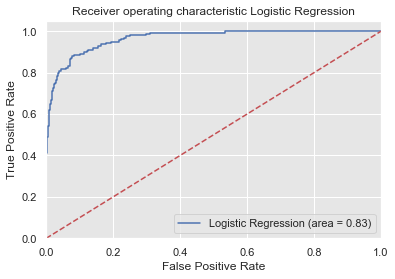

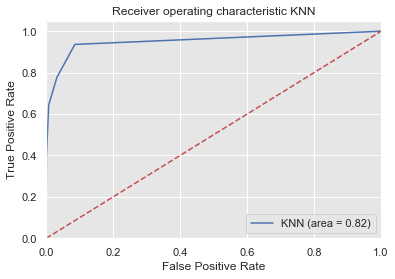

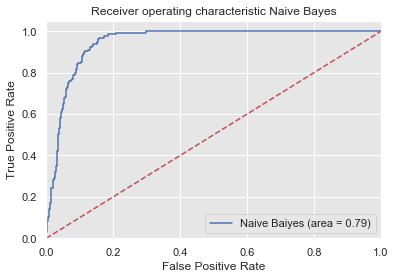

In [109]:
#ROC Curve of all models
# Logistics Regression ROC
fpr, tpr, thresholds = roc_curve(Y_test, logitregr2.predict_proba(X_test5)[:,1])
plt.figure()
plt.plot(fpr, tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# KNN ROC
KNN_roc_auc = roc_auc_score(Y_test, predicted_labels_test)
fpr, tpr, thresholds = roc_curve(Y_test, KNN_clf_n5.predict_proba(X_test5)[:,1])
plt.figure()
plt.plot(fpr, tpr,label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic KNN')
plt.legend(loc="lower right")
plt.show()

# NB ROC
fpr, tpr, thresholds = roc_curve(Y_test,probs[:,1])
plt.plot(fpr, tpr,label='Naive Baiyes (area = %0.2f)' % NB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Naive Bayes')
plt.legend(loc="lower right")
plt.show()

KNN & Logistic regression model nearly performed same as both model has very close AUC (~0.82) and F1 score. Both model have very similar precision, recall and overall accuracy. However, Naive Bayes model performed poorly specially recall is very high. Naive model is working good on train data but not on test data mainly because of overfitting. The recommended model can be both logistic regression and KNN however KNN being lazy learner and computationally expension, logistic regression model can be used for predictions.